## MovieLens Dataset analysis

# Overview
- Reading the data
- Data analysis
- Clean gurbage data
- Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from wordcloud import WordCloud, STOPWORDS  # used to generate world cloud
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
pd.set_option('mode.chained_assignment', None)

startTime = time.time()
movies = pd.read_csv("20M/movies.csv")
ratings = pd.read_csv("20M/ratings.csv")
# links = pd.read_csv("20M/links.csv")
tags = pd.read_csv("20M/tags.csv")
# genomeScores = pd.read_csv("20M/genome-scores.csv")
# genomeTags = pd.read_csv("20M/genome-tags.csv")
print("It took %s seconds to load the data" % (time.time() - startTime))

It took 3.9839041233062744 seconds to load the data


## Exploring the data 
As links only contains the url parts, we won't use it in our models

## Data Cleaning and Analysis

In [2]:
# startTime = time.time()
print(movies.shape)
print(ratings.shape)
# print(links.shape)
print(tags.shape)

(27278, 3)
(20000263, 4)
(465564, 4)


In [3]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [4]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [5]:
tags.isnull().any()  # tag has some null value, so we will remove it from the dataset

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [6]:
tags = tags.dropna()
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

### Now we are going to make another column 'year' in movies dataframe, from the title

In [7]:
movies['year'] = movies['title'].str.extract('\\(([0-9]+)\\)$', expand = False)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001


In [8]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [9]:
movies = movies.dropna()
movies.isnull().any()  # removing null values

movieId    False
title      False
genres     False
year       False
dtype: bool

#### Observation
We don't need the timestamp and userId for our insight, so we will remove the timestamp and userId column from both the tags and ratings table.
We are making new table for genres and movieId, so we will also remove genres from movies table.

In [10]:
movies['year'] = movies['year'].astype(int)
moviesGenres = movies[['year','genres']].copy()
del movies['genres']
del ratings['timestamp']
del ratings['userId']
del tags['timestamp']
del tags['userId']

#### Join operations

In [11]:
%%time
movies_tags = pd.merge(movies[['movieId', 'title']], tags['movieId'], on='movieId')
movies_ratings_year = pd.merge(movies[['movieId', 'year']], ratings[['movieId', 'rating']], on='movieId')
movies_ratings_title = pd.merge(movies[['movieId', 'title']], ratings[['movieId', 'rating']], on='movieId')

CPU times: user 3.97 s, sys: 2.39 s, total: 6.36 s
Wall time: 6.52 s


### Taking random sample from ratings (same as Hillview implementation)

In [12]:
sample_ratings = ratings.sample(n=100000, random_state=1)

In [13]:
%%time
sample_movies_ratings_year = pd.merge(movies[['movieId', 'year']], sample_ratings[['movieId', 'rating']], on='movieId')
sample_movies_ratings_title = pd.merge(movies[['movieId', 'title']], sample_ratings[['movieId', 'rating']], on='movieId')

CPU times: user 24.1 ms, sys: 8.05 ms, total: 32.2 ms
Wall time: 30.9 ms


## Data visualization

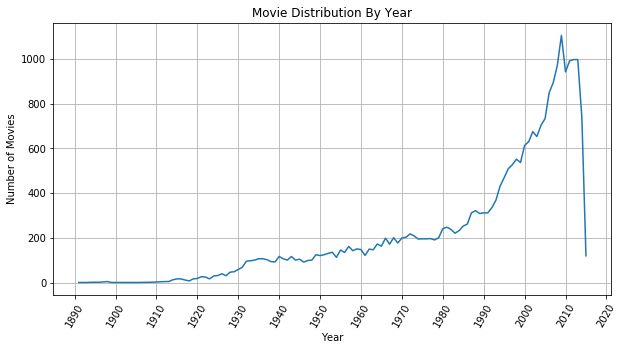

In [14]:
def movies_per_year():
    movie_year_count = movies.groupby('year').count()['movieId']
    plt.figure(figsize=(10,5))
    plt.plot(movie_year_count)
    plt.xticks(np.arange(1890, 2015 + 10, 10), rotation=60)
    plt.grid()
    plt.ylabel("Number of Movies")
    plt.xlabel("Year")
    plt.title("Movie Distribution By Year")
    plt.show()
    

movies_per_year()

#### We can see that the number of movies are increasing over the year. Although after 2010 we can see a little decrease, because there isn't much data for recent years.

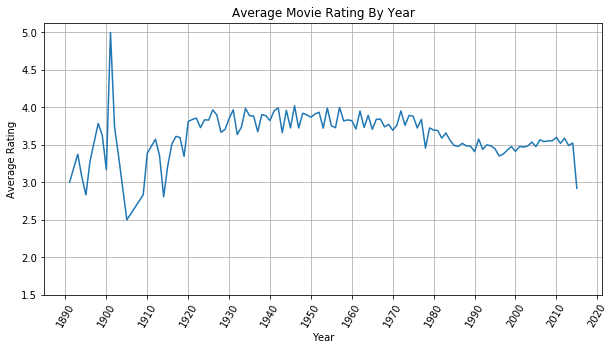

In [15]:
def ratings_per_year():
    avg_rating = movies_ratings_year.groupby('year').rating.mean()
    plt.figure(figsize=(10,5))
    plt.plot(avg_rating)
    plt.xticks(np.arange(1890, 2015 + 10, 10), rotation=60)
    plt.yticks(np.arange(1.5,5.5,0.5))
    plt.ylabel("Average Rating")
    plt.xlabel("Year")
    plt.title("Average Movie Rating By Year")
    plt.grid()
    plt.show()
    

ratings_per_year()

#### Unlike movie release, we see that the average movie rating by user is getting lower over the years.

### Now we will draw the same plot with our random sample ratings data(scaling) and see how well they produce the result
### Idea from the Hillview paper ***

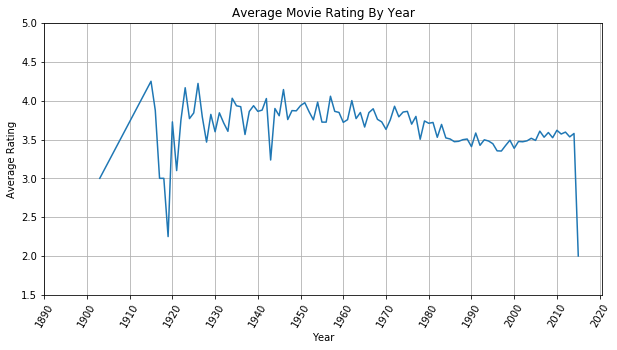

In [16]:
def sample_ratings_per_year():
    avg_rating = sample_movies_ratings_year.groupby('year').rating.mean()
    plt.figure(figsize=(10,5))
    plt.plot(avg_rating)
    plt.xticks(np.arange(1890, 2015 + 10, 10), rotation=60)
    plt.yticks(np.arange(1.5,5.5,0.5))
    plt.ylabel("Average Rating")
    plt.xlabel("Year")
    plt.title("Average Movie Rating By Year")
    plt.grid()
    plt.show()
    

sample_ratings_per_year()

#### As we can see, out of the 20M ratings, if we sample 100K random rows, it almost gives us the same result. Although it's not 100% accurate, but we can get the overview of the ratings and its trend.

#### So this way, we can scale our program for big data. Say, we have 1B ratings, but we can select 100K or 1M rows randomly and plot the insights. It will give us almost similar result compared to the actual result.

#### The take from the Hillview paper was really helpful and it enabled us to think on how to work with a huge amount of data, despite having a low configuration machine.

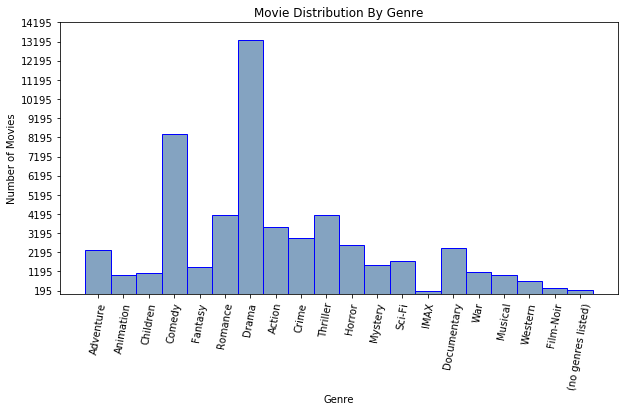

In [17]:
def movies_per_genre():
    moviesGenreCount = dict()
    for val in moviesGenres['genres'].values:
        for genre in val.strip().split('|'):
            if genre in moviesGenreCount:
                moviesGenreCount[genre] += 1
            else:
                moviesGenreCount[genre] = 1
    x, y = moviesGenreCount.keys(), moviesGenreCount.values()  # unpack a list of pairs into two tuples
    plt.figure(figsize=(10,5))
    plt.bar(x, y, width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
    plt.xticks(rotation=80)
    plt.yticks(np.arange(min(y), max(y) + 1000, 1000))
    plt.ylabel("Number of Movies")
    plt.xlabel("Genre")
    plt.title("Movie Distribution By Genre")
    plt.show()
    return x
    
    
diffMovieGenres = movies_per_genre()

#### Majority of the movies are either Drama or Comedy

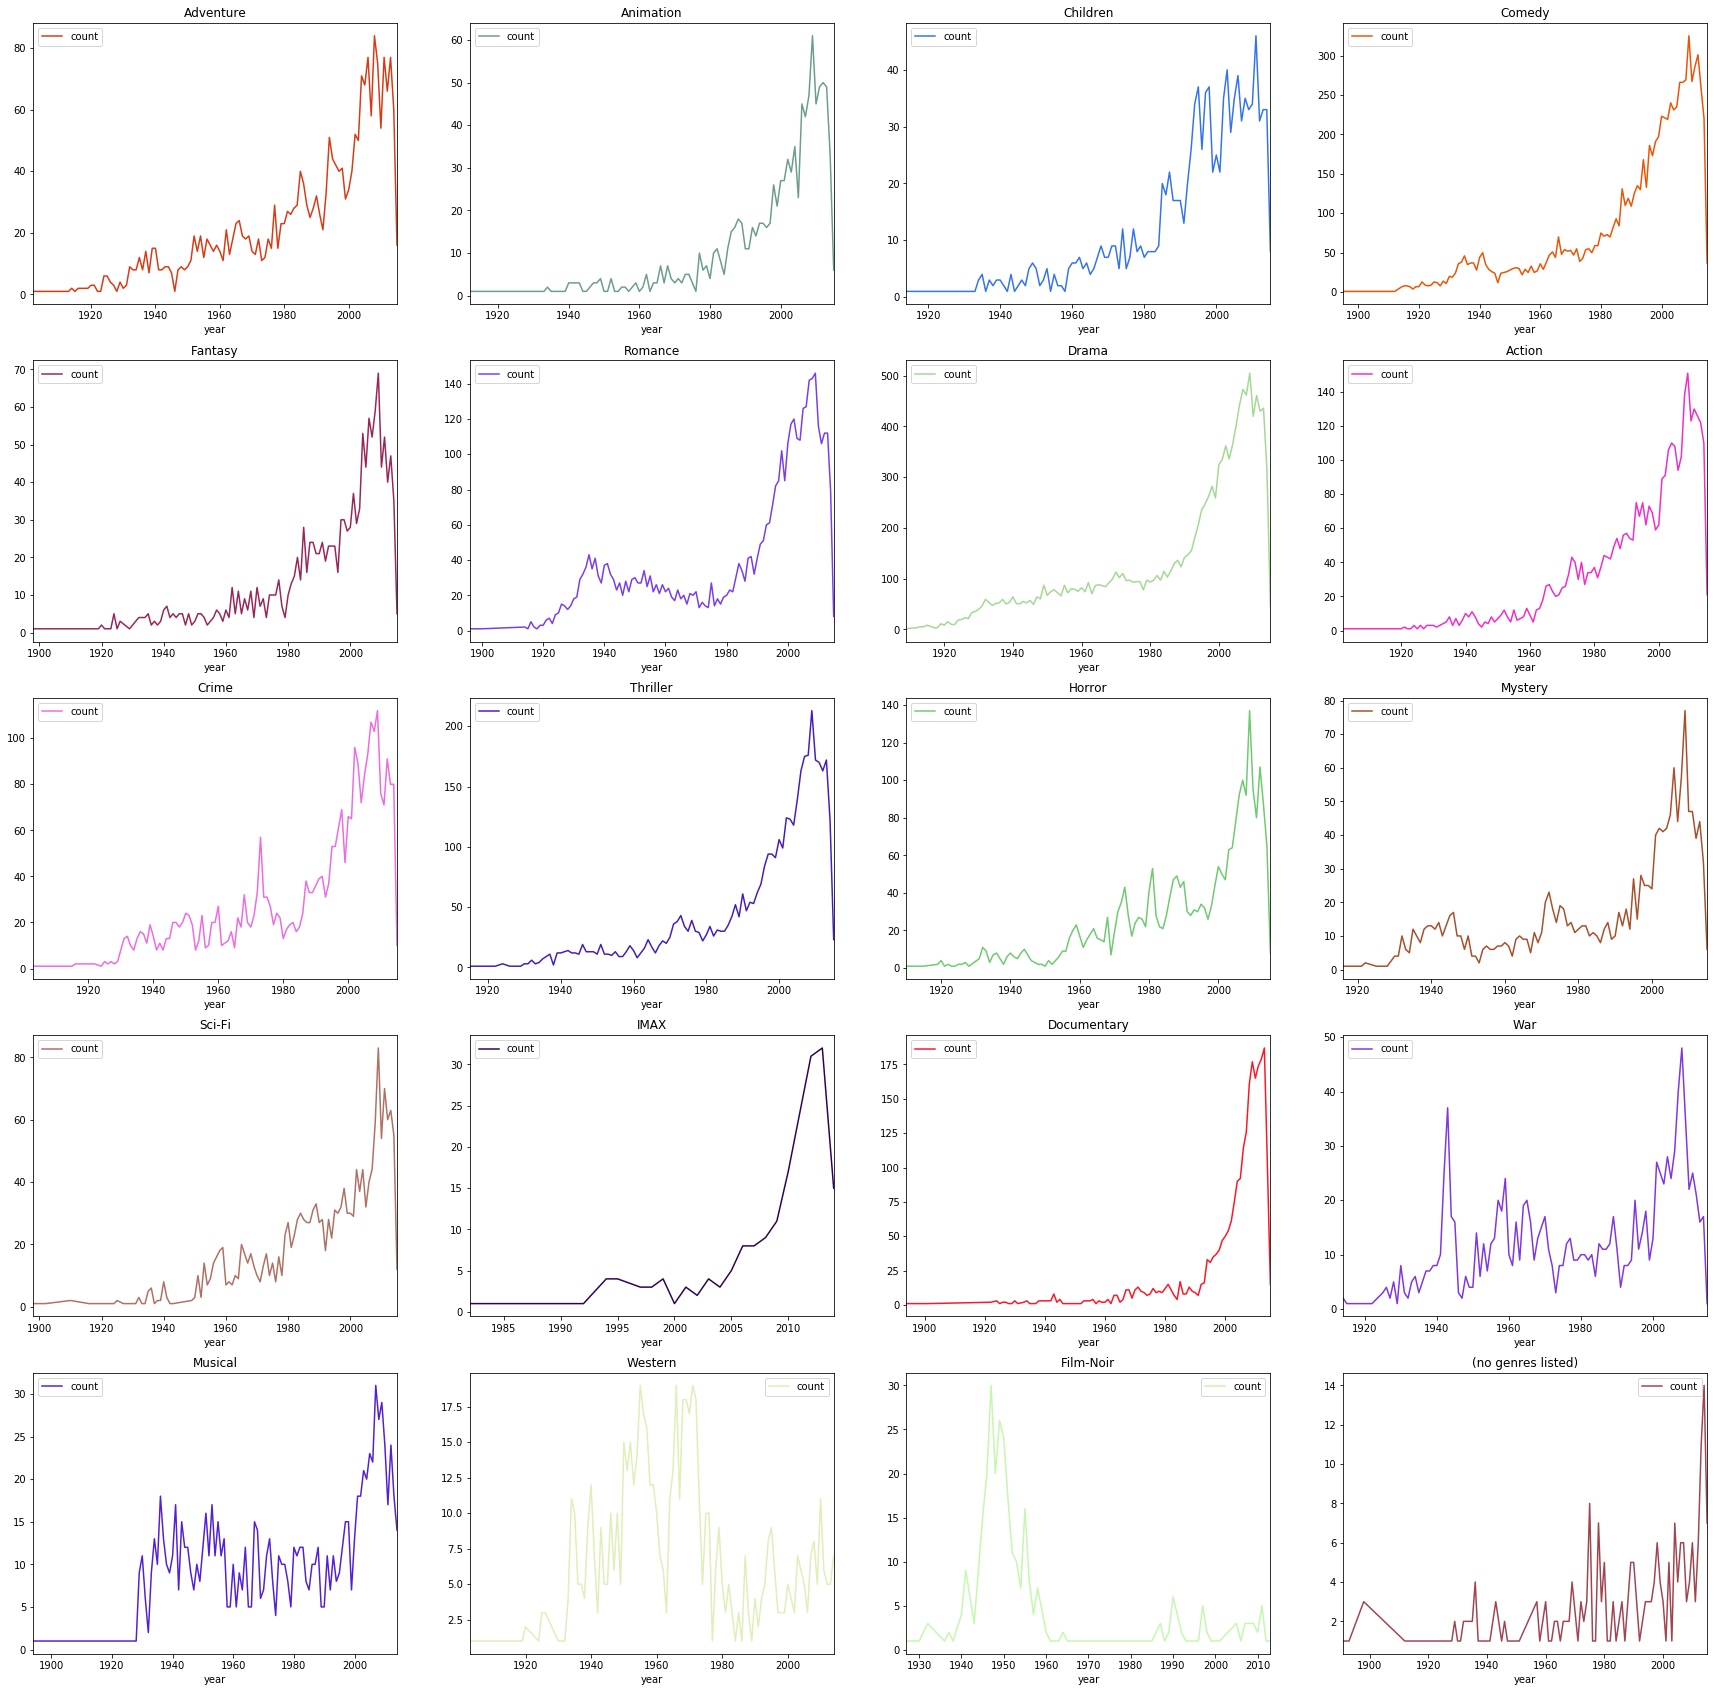

In [18]:
def genre_per_year():
    fig = plt.figure(figsize=(30,30))
    index = 1
    for genre in diffMovieGenres:
        filtered_result = moviesGenres[moviesGenres['genres'].str.contains(genre)]
        result = filtered_result.groupby('year')['genres'].count().reset_index(name="count")
        ax = fig.add_subplot(5, 4, index)
        result.plot(x='year', y='count', title=genre, c=np.random.rand(3, ), ax=ax)
        index += 1
    
    
genre_per_year()

#### For most of the genres, movie count is increasing over the years, except Film-Noir and Western. These category used to be popular before 1960, but in recent years their count is decreasing.

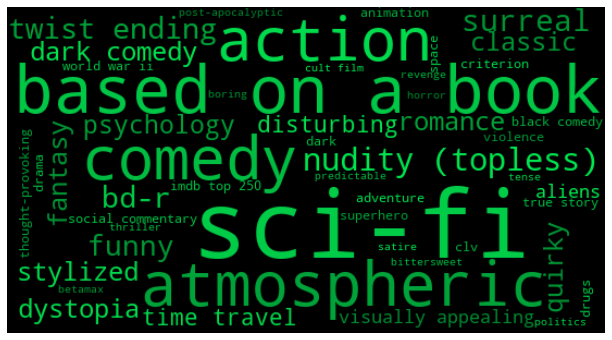

In [19]:
# define a function that counts the number of times each tag appear
def tags_data_parse():
    tag_count = dict()
    for tag in tags['tag']:
        tag = tag.lower()
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    tag_count = sorted(tag_count.items(), key = lambda x: x[1], reverse=True)
    return tag_count   


# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    tone = 100 # define the color of the words
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


def show_most_tagged():
    tag_count = dict(tags_data_parse()[0:50])
    f, ax = plt.subplots(figsize=(15, 6))
    wordcloud = WordCloud(width=550, height=300, background_color='black', 
                          max_words=50, relative_scaling=0.6,
                          color_func = random_color_func,
                          normalize_plurals=True)
    wordcloud.generate_from_frequencies(tag_count)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
    
show_most_tagged()

#### Here we can see sci-fi, comedy, based on a book etc. are the most tagged words by the users.

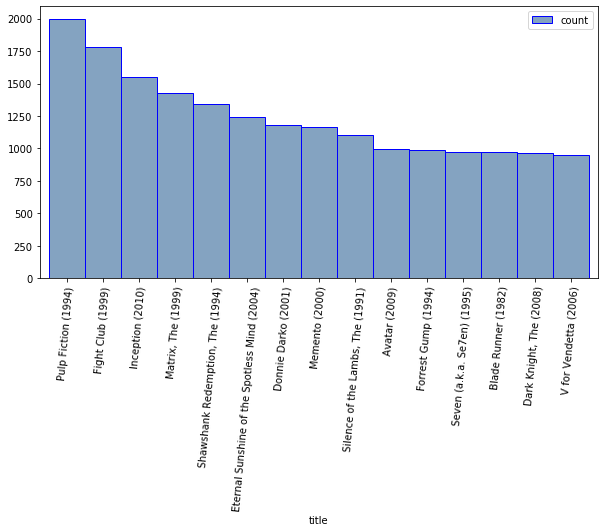

In [20]:
def movie_with_most_tags():
    title_count = movies_tags.groupby('title')["movieId"].count().reset_index(name="count")
    title_count = title_count.sort_values('count', ascending=False)[0:15]
    title_count.plot.bar(x='title', y='count', width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', figsize=(10,5), rot=85)
    
    
movie_with_most_tags()

#### Pulp Fiction(1994) is the most tagged movie in the survey.

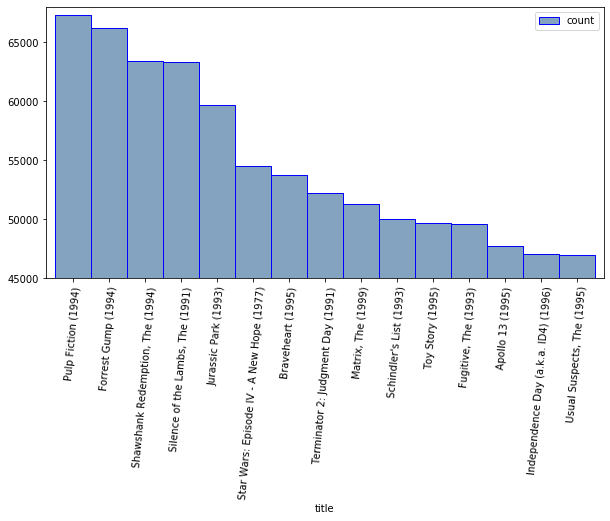

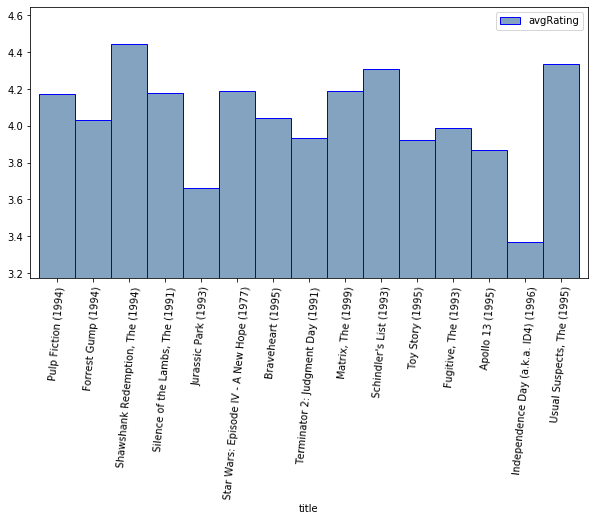

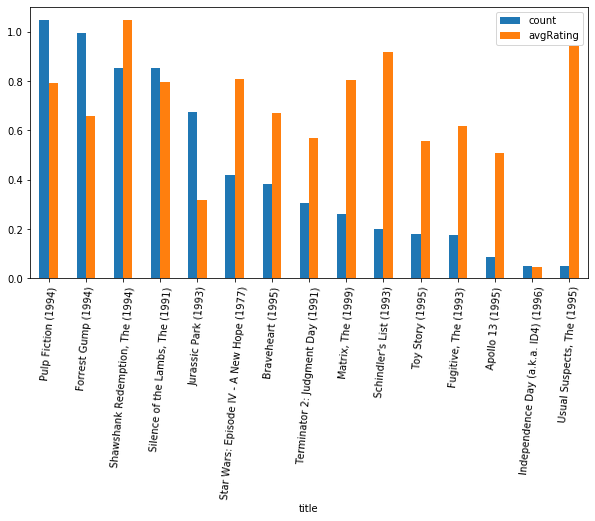

In [21]:
def movie_with_most_user_rating():
    rating_count = movies_ratings_title.groupby(['title'])['movieId'].count().to_frame('count').reset_index()
    avg_rating = movies_ratings_title.groupby(['title'])['rating'].mean().to_frame('avgRating').reset_index()
    most_rated_movies = rating_count.sort_values('count', ascending=False)[0:15]
    top_avg_rating = pd.merge(most_rated_movies[['title','count']], avg_rating[['title','avgRating']], on='title')
    top_avg_rating.plot.bar(x='title', y='count', ylim=(45000, 68000),
                            width=1.0, figsize=(10,5), facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', rot=85)
    top_avg_rating.plot.bar(x='title', y='avgRating', ylim=(min(top_avg_rating.avgRating)-0.2, max(top_avg_rating.avgRating)+0.2),
                            width=1.0, figsize=(10,5), facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', rot=85)
    top_avg_rating[['count']] = top_avg_rating[['count']].apply(lambda x: (x - x.min() + 1000) / (x.max() - x.min()))
    top_avg_rating[['avgRating']] = top_avg_rating[['avgRating']].apply(lambda x: (x - x.min() + .05) / (x.max() - x.min()))
    top_avg_rating.plot.bar(x='title', y=['count','avgRating'], figsize=(10,5), rot=85)

    
movie_with_most_user_rating()

#### Similar to the most tagged result, we can see that the Pulp Fiction(1994) is the most rated movie in the survey. Independence Day(a.k.a. ID4) (1996) and Jurassic Park(1993) are among the most rated movies, but their average ratings are comparatively lower.

#### We can also observe that, Forrest Gump(1994) is in the most rated movies, but not in the most tagged. On the otherhand, Fight Club(1999) is in the most tagged movies, but not in the most rated.

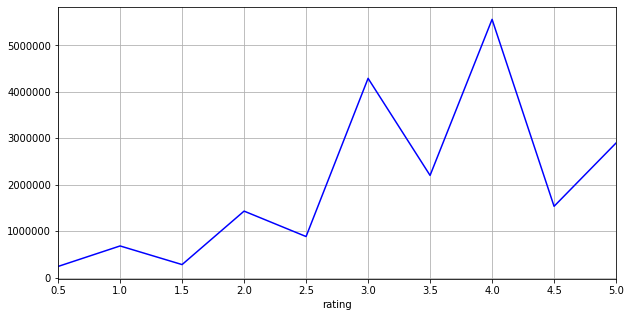

In [22]:
def rating_summary():
    avg_rating = ratings.groupby('rating')['movieId'].count()
    avg_rating.plot(grid=True, figsize=(10,5), color='blue')
    
    
rating_summary()

#### As we can see, most of the movies were rated 4.0 in the survey.

## Implementing Space-Time Cube idea on our Data Visualization

We will show the space-time cube for (year, rating vs movie_count)

How many movies in year 2000 got 3.5 rating?

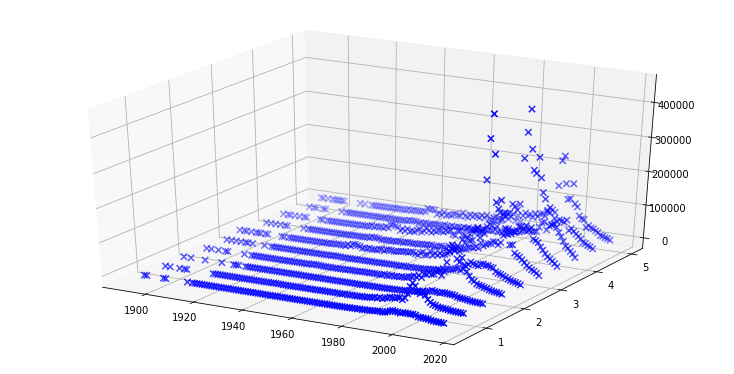

In [23]:
def space_time_cube():
    result = movies_ratings_year.groupby(['year','rating'])['movieId'].count().reset_index(name='count')
    fig = plt.figure(figsize=(10,5))
    ax = Axes3D(fig)
    x = result['year']
    y = result['rating']
    z = result['count']
    ax.scatter(x, y, z, s=40, c='blue', marker='x')
    
    
space_time_cube()

#### Here you can find the answer to the question above!

In [24]:
print("It took %s seconds to process the data" % (time.time() - startTime))

It took 24.10203504562378 seconds to process the data
